In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import linregfunc as lr

# <font face="gotham" color="purple"> Common Distributions in Hypothesis Testing </font>

Here we will have a quick refresh of distributions that are commonly used in hypothesis testing. 

## <font face="gotham" color="purple"> The Normal Distributions </font>

Normal Distribution is the most important one among all, here we provide a graphic reminder of bivariate normal distribution. Please check out my notebooks of linear algebra, there is a whole chapter devoted for normal distribution.

For your reference, the pdf of multivariate normal distribution is

$$
p(\boldsymbol{x} ; \mu, \Sigma)=\frac{1}{(2 \pi)^{n / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}(x-\mu)^{T} \Sigma^{-1}(x-\mu)\right) \tag{1}\label{1}
$$

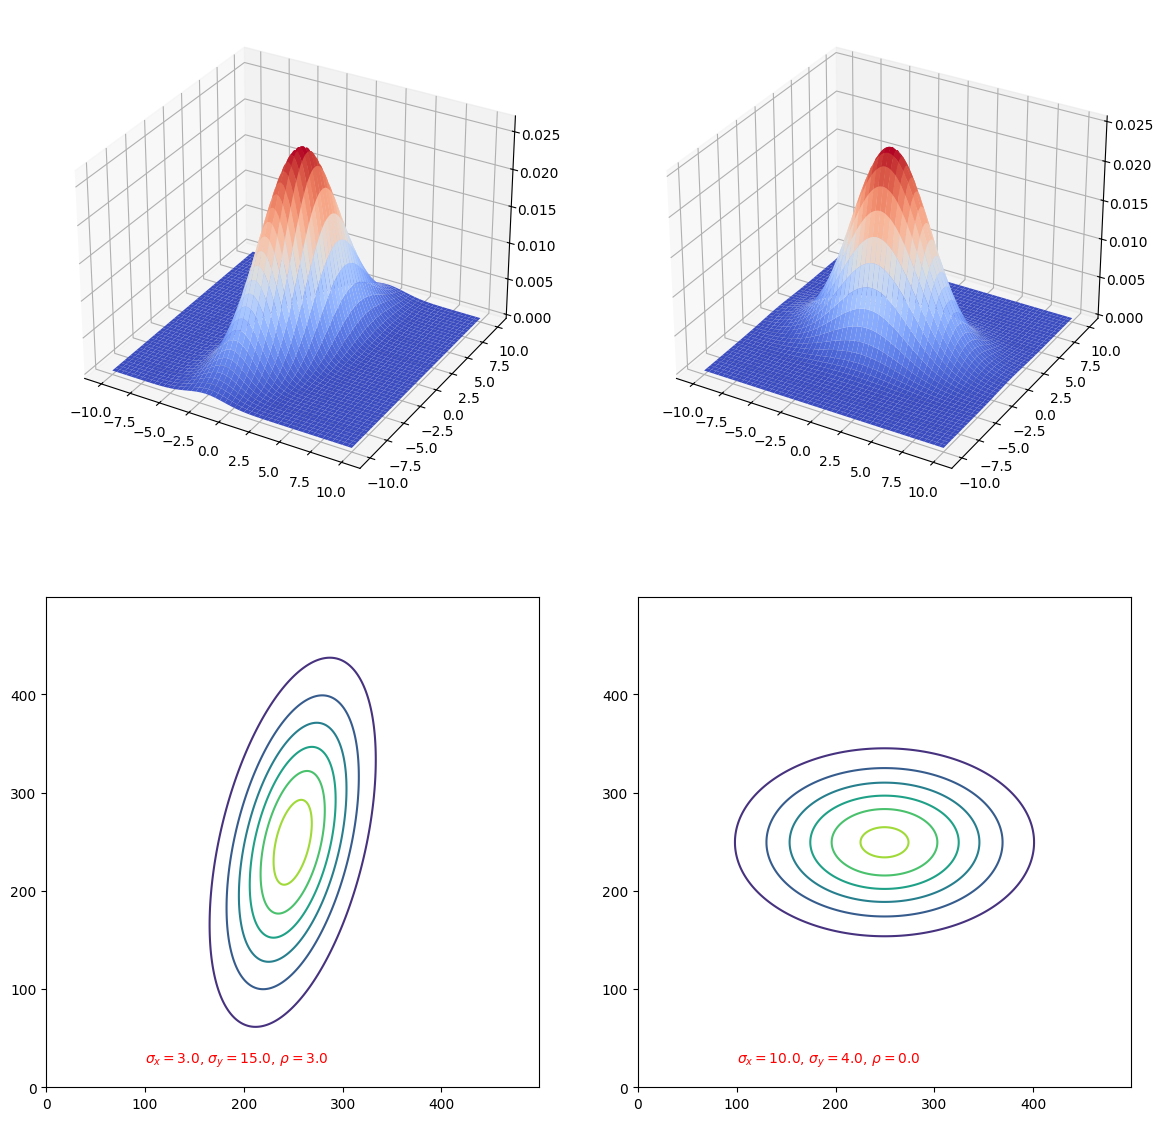

In [3]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)

pos = np.array([X.flatten(), Y.flatten()]).T  # two columns matrix

fig = plt.figure(figsize=(14, 14))

#########################
ax = fig.add_subplot(221, projection="3d")

mu_x = 0
mu_y = 0

sigma_x = 3
sigma_y = 15
rho = 3

rv = sp.stats.multivariate_normal(
    [mu_x, mu_y], [[sigma_x, rho], [rho, sigma_y]]
)  # frozen distribution
ax.plot_surface(X, Y, rv.pdf(pos).reshape(500, 500), cmap="coolwarm")

ax = fig.add_subplot(223)
ax.contour(rv.pdf(pos).reshape(500, 500))
string1 = r"$\sigma_x = %.1f$, $\sigma_y = %.1f$, $\rho = %.1f$" % (
    sigma_x,
    sigma_y,
    rho,
)
ax.annotate(text=string1, xy=(0.2, 0.05), xycoords="axes fraction", color="r")

####

mu_x = 0
mu_y = 0

sigma_x = 10
sigma_y = 4
rho = 0

rv = sp.stats.multivariate_normal(
    [mu_x, mu_y], [[sigma_x, rho], [rho, sigma_y]]
)  # frozen distribution
ax = fig.add_subplot(222, projection="3d")
ax.plot_surface(X, Y, rv.pdf(pos).reshape(500, 500), cmap="coolwarm")

ax = fig.add_subplot(224)
ax.contour(rv.pdf(pos).reshape(500, 500))
string2 = r"$\sigma_x = %.1f$, $\sigma_y = %.1f$, $\rho = %.1f$" % (
    sigma_x,
    sigma_y,
    rho,
)
ax.annotate(text=string2, xy=(0.2, 0.05), xycoords="axes fraction", color="r")
#########################

plt.show()

Keep in your mind: _any linear combination of normally distributed variables is yet a normal distribution_.

## <font face="gotham" color="purple"> The Chi-Squared Distribution </font>

If an $n$-random vector follows $iid$ normal distribution, $\boldsymbol{z}\sim N(\boldsymbol{0}, \mathbf{I})$. Then the random variable

$$
y = \boldsymbol{z}^T\boldsymbol{z} = \sum_{i=i}^n z_i^2
$$

is said to follow the **chi-squared distribution** with $n$ degrees of freedom. Denoted as

$$
y\sim\chi^2(n)
$$

The mean is 

$$\mathrm{E}(y)=\sum_{i=1}^{m} \mathrm{E}\left(z_{i}^{2}\right)=\sum_{i=1}^{m} 1=m$$

And the variance is

$$\begin{aligned}
\operatorname{Var}(y) &=\sum_{i=1}^{m} \operatorname{Var}\left(z_{i}^{2}\right)=m \mathrm{E}\left(\left(z_{i}^{2}-1\right)^{2}\right) \\
&=m \mathrm{E}\left(z_{i}^{4}-2 z_{i}^{2}+1\right)=m(3-2+1)=2 m
\end{aligned}$$

As $n$ increases, the probability density function of $\chi^2$ approaches the $N(m, 2m)$. Here is the graphic demonstration shows how $\chi^2$ distribution changes as d.o.f. rises.

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\user\AppData\Local\Temp\ipykernel_28520\1020018609.py:5: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(x, chi_pdf, lw = 3, label = '$\chi^2 (%.0d)$'%i)


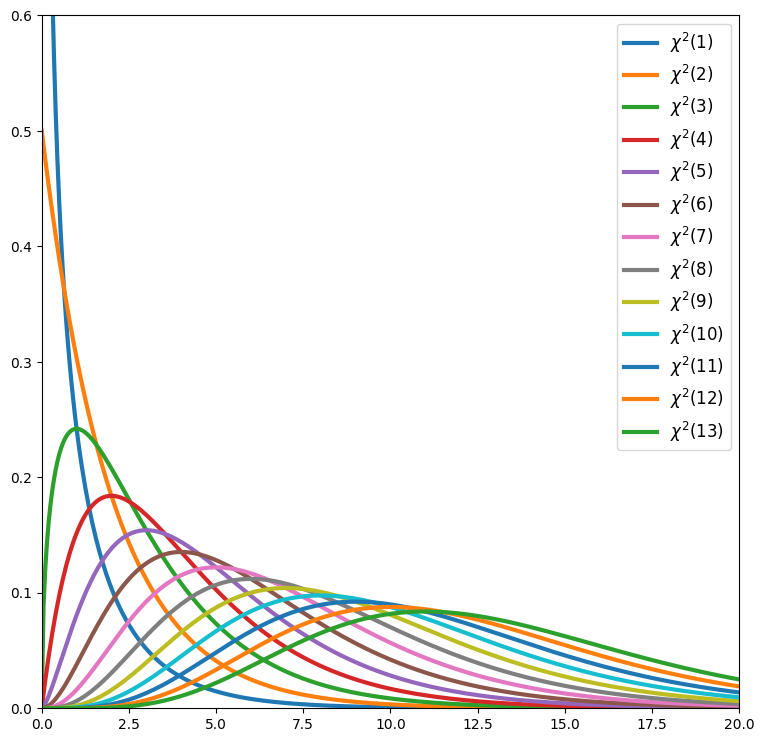

In [4]:
fig, ax = plt.subplots(figsize=(9, 9))
x = np.linspace(0, 50, 1000)
for i in range(1, 14):
    chi_pdf = sp.stats.chi2.pdf(x, i)
    ax.plot(x, chi_pdf, lw=3, label="$\chi^2 (%.0d)$" % i)
    ax.legend(fontsize=12)
ax.axis([0, 20, 0, 0.6])
plt.show()

### <font face="gotham" color="purple"> Quadratic Form of $\chi^2$ Distribution </font>

If an $n$-random vector $\boldsymbol{y} \sim N(\boldsymbol{\mu}, \Sigma)$ then 

$$
(\boldsymbol{y} - \boldsymbol{\mu})^T\Sigma^{-1}(\boldsymbol{y}-\boldsymbol{\mu})\sim \chi^2(n)
$$

If $\boldsymbol{y} \sim N(\boldsymbol{0}, \Sigma)$ simplifies the expression

$$
\boldsymbol{y}^T\Sigma^{-1}\boldsymbol{y}\sim \chi^2(n)
$$

We will show why that holds by using diagonal decomposition. Since the $\Sigma$ is symmetric, it is orthogonally diagonalizable, 


$$
\Sigma = QDQ^T 
$$

where 

$$
D=\left[\begin{array}{ccccc}
\lambda_{1} & 0 & 0 & \ldots & 0 \\
0 & \lambda_{2} & 0 & \ldots & 0 \\
\vdots & \vdots & \vdots & & \vdots \\
0 & 0 & 0 & \ldots & \lambda_{n}
\end{array}\right]
$$

$\lambda$s are eigenvalues. And $Q^{-1} = Q^T$, $Q$ holds all the eigenvectors of $\Sigma$ which are mutually perpendicular.

Denote $D^*$ as 

$$
D^* =
\left[\begin{array}{ccccc}
\frac{1}{\sqrt{\lambda_{1}}} & 0 & 0 & \ldots & 0 \\
0 & \frac{1}{\sqrt{\lambda_{2}}} & 0 & \ldots & 0 \\
\vdots & \vdots & \vdots & & \vdots \\
0 & 0 & 0 & \ldots & \frac{1}{\sqrt{\lambda_{n}}}
\end{array}\right]
$$

Let the matrix $H = QD^*Q^T$, since $H$ is also symmetric

$$
HH^T= QD^*Q^TQD^*Q^T= Q^TD^*D^*Q = QD^{-1}Q^T =\Sigma^{-1}
$$

Furthermore

$$
H\Sigma H^T = QD^*Q^T\Sigma QD^*Q^T = QD^*Q^TQDQ^T  QD^*Q^T = QD^*DD^*Q^T = QQ^T = I
$$

Back to the results from above, we set $\boldsymbol{z} = H^T (\boldsymbol{y}-\boldsymbol{\mu})$, which is standard normal distribution since

$$
E(\boldsymbol{z})= H^TE(\boldsymbol{y}-\boldsymbol{\mu})=\boldsymbol{0}\\
\text{Var}(\boldsymbol{z}) = H\text{Var}(\boldsymbol{y}-\boldsymbol{\mu})H^T =H\Sigma H^T = I 
$$

Back to where we started

$$
(\boldsymbol{y}-\boldsymbol{\mu})^T\Sigma^{-1}(\boldsymbol{y}-\boldsymbol{\mu}) = (\boldsymbol{y}-\boldsymbol{\mu})^THH^T (\boldsymbol{y}-\boldsymbol{\mu}) = (H^T (\boldsymbol{y}-\boldsymbol{\mu}))^T(H^T (\boldsymbol{y}-\boldsymbol{\mu})) = \boldsymbol{z}^T\boldsymbol{z}
$$

here we proved that $(\boldsymbol{y}-\boldsymbol{\mu})^T\Sigma^{-1}(\boldsymbol{y}-\boldsymbol{\mu}) \sim \chi^2(n)$.

More details of proof in <a href='https://math.stackexchange.com/questions/2808041/x-normally-distributed-then-xt-sigma-1-x-follows-chi-square-distribut?noredirect=1&lq=1'>this page</a>.


## <font face="gotham" color="purple"> The Student’s $t$ Distribution </font>

If $z\sim N(0, 1)$ and $y\sim \chi^2(m)$, and $z$ and $y$ are independent, then 

$$
t = \frac{z}{\sqrt{y/m}}
$$

follows the **Student's t distribution** with $m$ d.o.f. 

Here is the plot of $t$-distribution, note that $t(1)$ is called **Cauchy distribution** which has no moments at all, because integral does not converge due to fat tails.

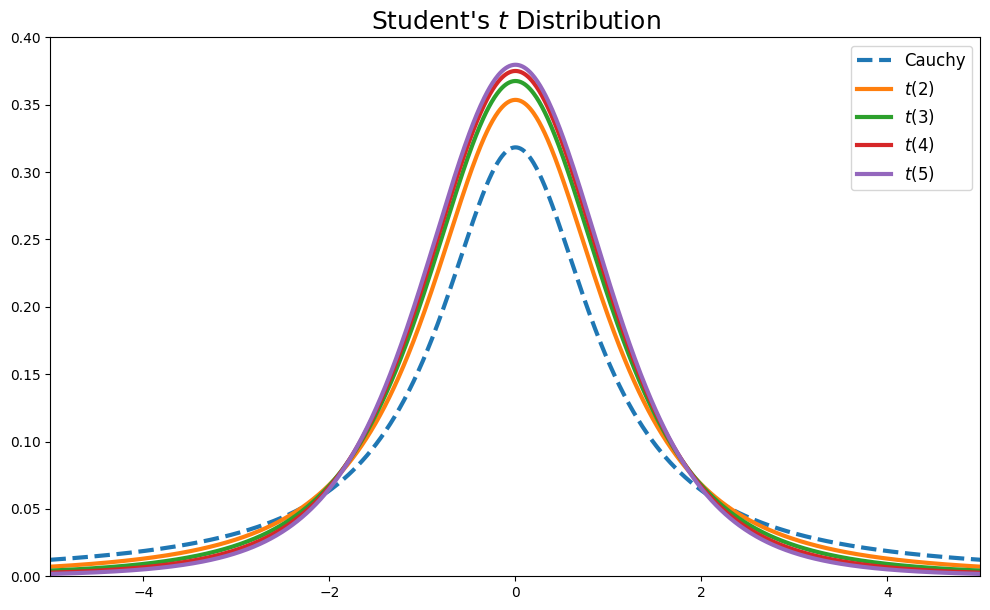

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))
x = np.linspace(-5, 5, 1000)
for i in range(1, 6):
    chi_pdf = sp.stats.t.pdf(x, i)
    if i == 1:
        ax.plot(x, chi_pdf, lw=3, label="Cauchy", ls="--")
        continue
    else:
        ax.plot(x, chi_pdf, lw=3, label="$t (%.0d)$" % i)
        ax.legend(fontsize=12)
ax.axis([-5, 5, 0, 0.4])
ax.set_title("Student's $t$ Distribution", size=18)
plt.show()

As $m \rightarrow \infty$, $t(m)\rightarrow N(0, 1)$, in the limit process, the tails of $t$ distribution will diminish, and becoming thinner.

## <font face="gotham" color="purple"> The $F$ Distribution </font>

If $y_1$ and $y_2$ are independent random variables distributed as $\chi^2(m_1)$ and $\chi^2(m_2)$, then the random variable 

$$
F = \frac{y_1/m_1}{y_2/m_2}
$$

follows the **$F$ distribution**, denoted $ F(m_1, m_2)$.

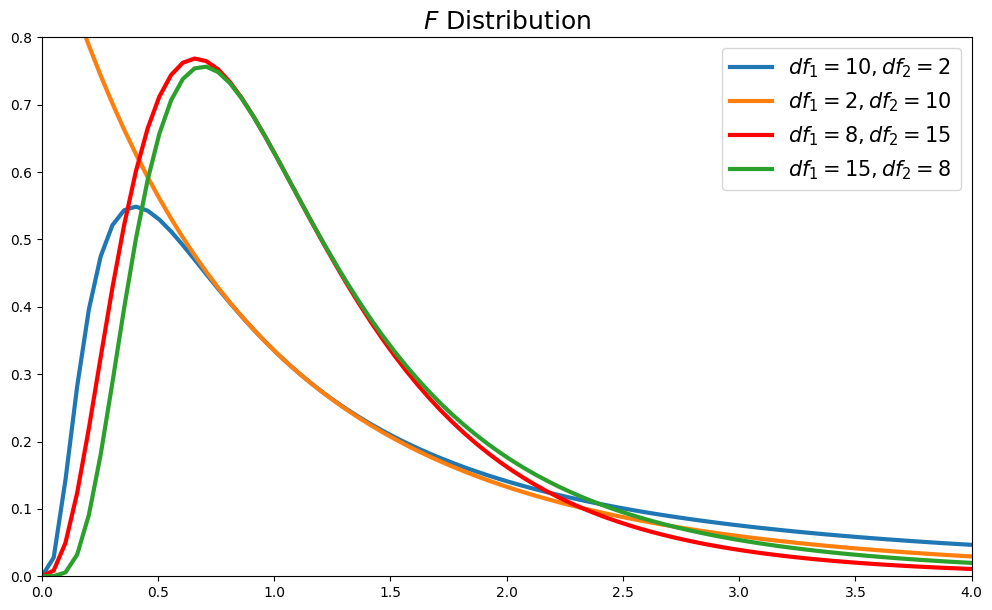

In [6]:
x = np.linspace(0.001, 5, 100)
fig, ax = plt.subplots(figsize=(12, 7))

df1 = 10
df2 = 2
f_pdf = sp.stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, label="$df_1 = %.d, df_2 = %.d$" % (df1, df2))

df1 = 2
df2 = 10
f_pdf = sp.stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, label="$df_1 = %.d, df_2 = %.d$ " % (df1, df2))

df1 = 8
df2 = 15
f_pdf = sp.stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, color="red", label="$df_1 = %.d, df_2 = %.d$" % (df1, df2))

df1 = 15
df2 = 8
f_pdf = sp.stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, label="$df_1 = %.d, df_2 = %.d$ " % (df1, df2))

ax.legend(fontsize=15)
ax.axis([0, 4, 0, 0.8])
ax.set_title("$F$ Distribution", size=18)
plt.show()

# <font face="gotham" color="purple">Single Restriction </font>

Any linear restriction, such as $\beta_1 = 5$, $\beta_1 =2{\beta_2}$ can be tested, however, no loss of generality if linear restriction of $\beta_2=0$ is demonstrated. 

We first take a look at single restriction, see how FWL regression can help to construct statistic tests. 

The regression model is 

$$
\boldsymbol{y} = \boldsymbol{X}_1\boldsymbol{\beta}_1+\beta_2\boldsymbol{x}_2+\boldsymbol{u}
$$

where $\boldsymbol{x}_2$ is an $n$-vector, whereas $\boldsymbol{X}_1$ is an $n\times (m-1)$ matrix. 

Project $\boldsymbol{X}_1$ off $\boldsymbol{x}_2$, the FWL regression is

$$
\boldsymbol{M}_1\boldsymbol{y} = \beta_2\boldsymbol{M}_1\boldsymbol{x}_2 + \boldsymbol{M}_1\boldsymbol{u}
$$

Applying OLS estimate and variance formula,

$$
\hat{\beta}_2 = [(\boldsymbol{M}_1\boldsymbol{x}_2)^T\boldsymbol{M}_1\boldsymbol{x}_2]^{-1}(\boldsymbol{M}_1\boldsymbol{x}_2)^T\boldsymbol{M}_1\boldsymbol{y}=(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{-1}\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}=\frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2}\\
\text{Var}(\hat{\beta}_2) = \sigma^2 [(\boldsymbol{M}_1\boldsymbol{x}_2)^T(\boldsymbol{M}_1\boldsymbol{x}_2)]^{-1} =  \sigma^2(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{-1}
$$

If null hypothesis is $\beta_2^0=0$, also assuming that $\sigma^2$ is known. Construct a $z$-statistic

$$
z_{\beta_2} = \frac{\hat{\beta}_2}
{\sqrt{\text{Var}(\hat{\beta}_2)}}=\frac{\frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2}}{ \sigma(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{-\frac{1}{2}}}
= \frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{\sigma(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{\frac{1}{2}}}
$$

However, $\sigma$ is not likely to be known, hence we replace it with $s$, the least square standard error estimator. Recall that 

$$
s^2 =\frac{1}{n-k} \sum_{t=1}^n u_t^2 = \frac{\boldsymbol{u}^T\boldsymbol{u}}{n-k}= \frac{(\boldsymbol{M_X y})^T\boldsymbol{M_X y}}{n-k}=\frac{\boldsymbol{y}^T\boldsymbol{M_X y}}{n-k}
$$

Replace the $\sigma$ in $z_{\beta_2}$, we obtain $t$-statistic

$$
t_{\beta_2} =  \frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{s(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{\frac{1}{2}}} = \left(\frac{\boldsymbol{y}^T\boldsymbol{M_X y}}{n-k}\right)^{-\frac{1}{2}}\frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{\frac{1}{2}}}
$$

Of course we can also show it indeed follows the $t$ distribution by using the definition that the ratio of standard normal variable to a $\chi^2$ variable. However, this is unnecessary for us.

# <font face="gotham" color="purple"> Multiple Restrictions </font>

Multiple restrictions test can be formulated as following

$$
H_0:\quad \boldsymbol{y} = \boldsymbol{X}_1\boldsymbol{\beta_1} + \boldsymbol{u}\\
H_1:\quad \boldsymbol{y} = \boldsymbol{X}_1\boldsymbol{\beta_1} +\boldsymbol{X}_2\boldsymbol{\beta_2}+ \boldsymbol{u}
$$

$H_0$ is restricted model, $H_1$ is unrestricted. And we denote restricted residual sum of squares as $\text{RRSS}$, and unrestricted residual sum of squares as $\text{URSS}$, the test statistic is 

$$
F_{\beta_2}= \frac{(\text{RRSS}-\text{URSS})/r}{\text{URSS}/(n-k)}
$$

where $r=k_2$, the number of restrictions on $\beta_2$.

Using FWL regression with $\boldsymbol{M}_1$ and $\text{TSS = ESS + RSS}$, 

$$
\boldsymbol{M}_1\boldsymbol{y}=\boldsymbol{M}_1\boldsymbol{X}_2\boldsymbol{\beta}_2+\boldsymbol{u} \tag{FWL regression}
$$

\begin{align}
\text{URSS}& =(\boldsymbol{M_1y})^T\boldsymbol{M_1y}- \underbrace{\left[\boldsymbol{M}_1\boldsymbol{X}_2[(\boldsymbol{M}_1\boldsymbol{X}_2)^T\boldsymbol{M}_1\boldsymbol{X}_2]^{-1}(\boldsymbol{M}_1\boldsymbol{X}_2)^T\boldsymbol{y}\right]^T}_{\text{projection matrix}\ P}\boldsymbol{y}\\
 &= \boldsymbol{y}^T\boldsymbol{M}_1\boldsymbol{y} -\boldsymbol{y}^T\boldsymbol{M}_1\boldsymbol{X}_2(\boldsymbol{X}_2^T\boldsymbol{M}_1\boldsymbol{X}_2)^{-1}\boldsymbol{X}^T_2\boldsymbol{M}_1 \boldsymbol{y} = \boldsymbol{y}^T\boldsymbol{M_X}\boldsymbol{y}
\end{align}

$$
\text{RRSS} = (\boldsymbol{M}_1y)^T\boldsymbol{M}_1y = \boldsymbol{y}^T\boldsymbol{M}_1\boldsymbol{y}
$$

Therefore
$$
\text{RRSS}-\text{URSS}=\boldsymbol{y}^T\boldsymbol{M}_1\boldsymbol{X}_2(\boldsymbol{X}_2^T\boldsymbol{M}_1\boldsymbol{X}_2)^{-1}\boldsymbol{X}^T_2\boldsymbol{M}_1 \boldsymbol{y}
$$

We have all parts of $F$ statistic, combine them

$$
F_{\boldsymbol{\beta}_{2}}=\frac{\boldsymbol{y}^{T} \boldsymbol{M}_{1} \boldsymbol{X}_{2}\left(\boldsymbol{X}_{2}^{T} \boldsymbol{M}_{1} \boldsymbol{X}_{2}\right)^{-1} \boldsymbol{X}_{2}^{T} \boldsymbol{M}_{1} \boldsymbol{y} / r}{\boldsymbol{y}^{T} \boldsymbol{M}_{\boldsymbol{X}} \boldsymbol{y} /(n-k)}
$$

In contrast, $t$ statistic will be
$$
t_{\beta_{2}}=\sqrt{\frac{\boldsymbol{y}^{\top} \boldsymbol{M}_{1} \boldsymbol{x}_{2}\left(\boldsymbol{x}_{2}^{\top} \boldsymbol{M}_{1} \boldsymbol{x}_{2}\right)^{-1} \boldsymbol{x}_{2}^{\top} \boldsymbol{M}_{1} \boldsymbol{y}}{\boldsymbol{y}^{\top} \boldsymbol{M}_{\boldsymbol{X}} \boldsymbol{y} /(n-k)}}
$$

To test the equality of two parameter vectors, we modify the $F$ test as
$$
F_{\gamma}=\frac{\left(\mathrm{RRSS}-\mathrm{RSS}_{1}-\mathrm{RSS}_{2}\right) / k}{\left(\mathrm{RSS}_{1}+\mathrm{RSS}_{2}\right) /(n-2 k)}
$$
for example, the sample being divided into two subsamples, to compare the stability of two subsamples, this so-called **Chow test** is a common practice.

# <font face="gotham" color="purple"> Asymptotic Theory  </font>

**Asymptotic Theory** is concerned with the distribution of estimators and test statistics as the sample size $n$ tends to infinity.

## <font face="gotham" color="purple"> Law of Large Numbers  </font>

The widely-known **Law of Large Numbers** ($\text{LLN}$) takes the form
$$
\bar{x} = \frac{1}{n}\sum_{t=1}^nx_t
$$
where $x_t$ are independent variables with its own bounded variance $\sigma_t^2$ and a common mean $\mu$. $\text{LLN}$ tells that as $n\rightarrow \infty$, then $\bar{x} \rightarrow \mu$.

The **Fundamental Theorem of Statistics** can be proved with $\text{LLN}$.

An **empirical distribution function** ($\text{EDF}$) can be expressed as
$$
\hat{F}(x) \equiv \frac{1}{n} \sum_{t=1}^{n} I\left(x_{t} \leq x\right)
$$
where $I(\cdot)$ is an **indicator function**, which takes value $1$ when its argument is true, otherwise $0$. To prove the Fundamental Theorem of Statistics, we invoke the $\text{LLN}$, expand the expectation

\begin{aligned}
\mathrm{E}\left(I\left(x_{t} \leq x\right)\right) &=0 \cdot \operatorname{Pr}\left(I\left(x_{t} \leq x\right)=0\right)+1 \cdot \operatorname{Pr}\left(I\left(x_{t} \leq x\right)=1\right) \\
&=\operatorname{Pr}\left(I\left(x_{t} \leq x\right)=1\right)=\operatorname{Pr}\left(x_{t} \leq x\right)=F(x)
\end{aligned}

It turns out that $\hat{F}(x)$ is a consistent estimator of $F(x)$.

## <font face="gotham" color="purple"> Central Limit Theorems  </font>

The **Central Limit Theorems** ($\text{CLT}$) tells that $\frac{1}{n}$ times the sum of $n$ centered random variables will approximately follow a normal distribution when $n$ is sufficiently large. The most well $\text{CLT}$ is **Lindeberg-Lévy** $\text{CLT}$, the quantity
$$
z \equiv \frac{1}{\sqrt{n}} \sum_{t=1}^{n} \frac{x_{t}-\mu}{\sigma}
$$
is **asymptotically distributed** as $N(0,1)$.

We won't bother to prove them, but they are the implicit theoretical foundation when we are discussing **simulation-based tests**.